In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("unsupervised_dataset.csv")

Generated data by myself. 1000 samples among which 50 are outliers

In [7]:
df.head()

,feature_1,feature_2
0,4.586280,2.990218
1,1.009911,4.010415
2,3.453109,2.814832
3,2.687654,1.012342
4,1.834824,1.381133


The generated data need not to be scaled. Also no null values, since we already know to scale the data and to handle missing values. But added outliers just to see how K-means and DBScan handles the outliers

In [10]:
df.shape

(1000, 2)

In [12]:
df.isnull().sum()

feature_1    0
feature_2    0
dtype: int64

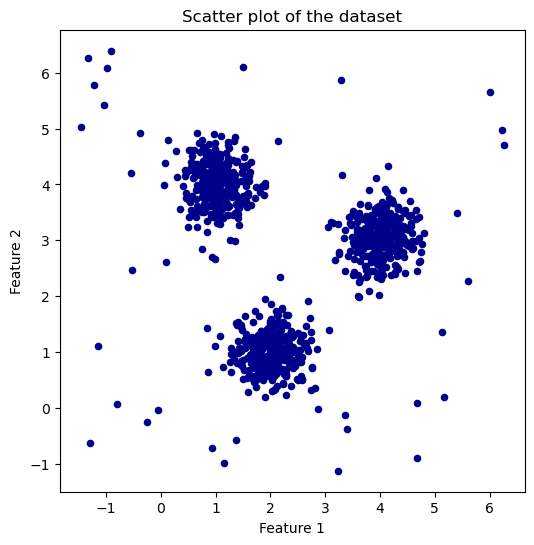

In [14]:
plt.figure(figsize=(6,6))
plt.scatter(df['feature_1'], df['feature_2'], s=20, color='darkblue')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter plot of the dataset")
plt.show()

In [40]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5) ## default value of hyperparameters
dbscan.fit(df[['feature_1', 'feature_2']])

DBSCAN()

In [42]:
# Get cluster labels
labels = dbscan.labels_
# Add cluster labels to DataFrame
df['cluster'] = labels
df.head()

,feature_1,feature_2,cluster
0,4.586280,2.990218,0
1,1.009911,4.010415,1
2,3.453109,2.814832,0
3,2.687654,1.012342,2
4,1.834824,1.381133,2


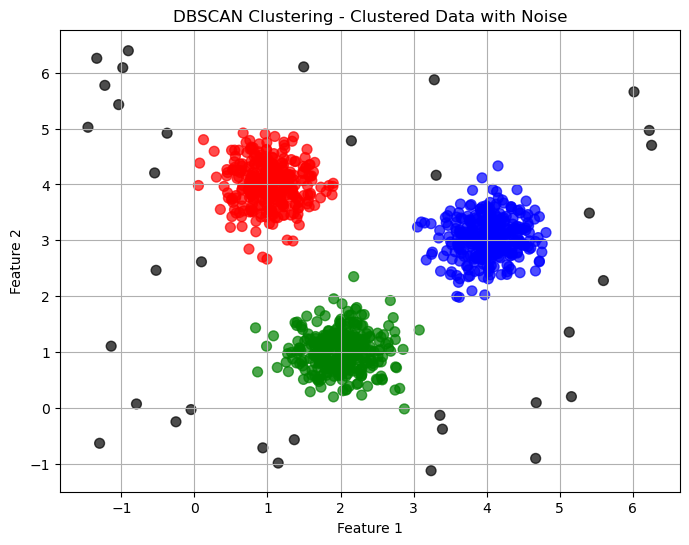

In [44]:

# Define colors (you can extend this list for more clusters)
colors = ['blue', 'red', 'green', 'purple', 'orange']

# Create color mapping including noise (-1)
unique_labels = np.unique(labels)
cluster_colors = []
for label in labels:
    if label == -1:  # noise
        cluster_colors.append('black')
    else:
        cluster_colors.append(colors[label % len(colors)])

plt.figure(figsize=(8, 6))
plt.scatter(df['feature_1'], df['feature_2'], c=cluster_colors, s=50, alpha=0.7)
plt.title("DBSCAN Clustering - Clustered Data with Noise")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


#### If DBSCAN is so good at handling outliers and also no need to specify no. of clusters too, then why not always use this same algorithm instead of k-means?

It is because DBSCAN is computationally expensive for large dataset and more importantly, we cannot predict for new datapoints. In dbscan, clusters are defined by relationships, not parameters (like weight, centroid etc). That’s why it cannot predict for new datapoint. 

Only way to predict in dbscan is add that datapoint in the dataset and rerun the entire algorithm.

#### So why use DBSCAN? why not other algorighms?

There are certain cases where DBSCAN perfectly clusters the dataset whereas other algorithms cannot. Example in next notebook.